<a href="https://colab.research.google.com/github/aSafarpoor/DIP/blob/main/DIP_HW2_99210301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIP HW2

Ali Safarpoor Dehkordi

99210301



# imports:

In [21]:
from numpy.core.shape_base import block
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from scipy.fft import fft, fftfreq, fft2, ifft2
from  scipy import stats
from google.colab.patches import cv2_imshow
from math import exp
from sklearn.decomposition import PCA
import tifffile as tiff
from tqdm import tqdm

# Q1

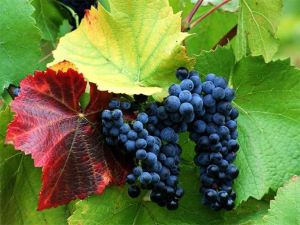

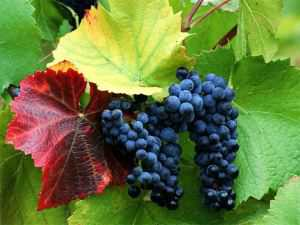

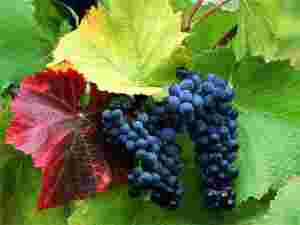

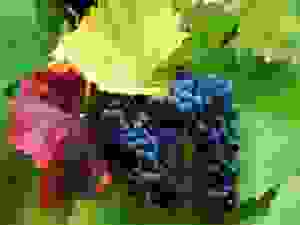

In [18]:
image_path = "image.jpeg"
image_file = Image.open(image_path)
  
# the default
image_file.save("100.jpeg", quality=100)
image_file.save("50.jpeg", quality=50)
image_file.save("10.jpeg", quality=10)
image_file.save("1.jpeg", quality=1)

# PIL.Image.open(image_path).convert('RGB')
image_file = cv2.imread('100.jpeg')
cv2_imshow(image_file)
image_file = cv2.imread('50.jpeg')
cv2_imshow(image_file)
image_file = cv2.imread('10.jpeg')
cv2_imshow(image_file)
image_file = cv2.imread('1.jpeg')
cv2_imshow(image_file)

100%|██████████| 100/100 [00:00<00:00, 339.50it/s]


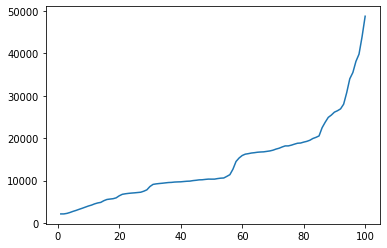

In [22]:
image_path = "image.jpeg"
image_file = Image.open(image_path)
  
# the default
l = []
for i in tqdm(range(1,101)):
    image_file.save(str(i)+".jpeg", quality=i)
    l.append(os.path.getsize(str(i)+".jpeg"))

plt.plot(range(1,101),l)


# Q2

In [4]:
x = np.arange(0, 100, 0.01)
y = np.sin(x*np.pi)

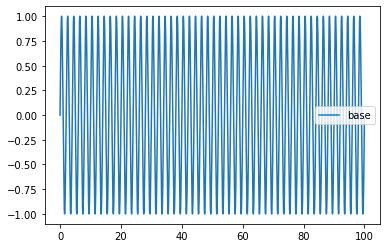

In [5]:
plt.plot(x,y,label='base')
plt.legend()
plt.show()

In [6]:
x100 = [x[i] for i in range(0,len(x),100)]
y100 = [y[i] for i in range(0,len(x),100)]

x101 = [x[i] for i in range(0,len(x),101)]
y101 = [y[i] for i in range(0,len(x),101)]

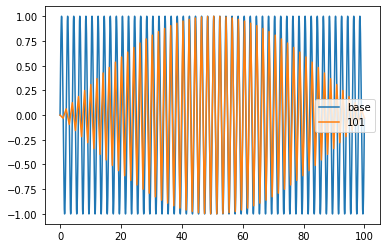

In [8]:
plt.plot(x,y,label='base')
plt.plot(x101,y101,label='101')

plt.legend()
plt.show()

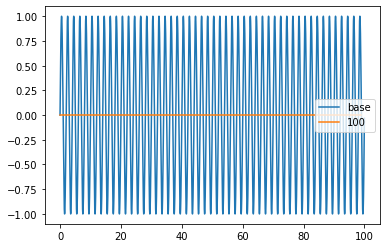

In [9]:
plt.plot(x,y,label='base')
plt.plot(x100,y100,label='100')

plt.legend()
plt.show()

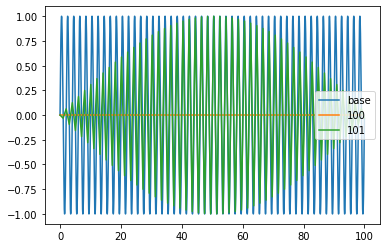

In [10]:
plt.plot(x,y,label='base')
plt.plot(x100,y100,label='100')
plt.plot(x101,y101,label='101')

plt.legend()
plt.show()

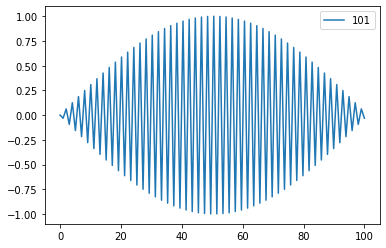

In [ ]:
plt.plot(x101,y101,label='101')
plt.legend()
plt.show()

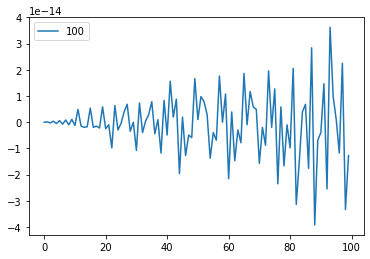

In [ ]:
plt.plot(x100,y100,label='100')
plt.legend()
plt.show()

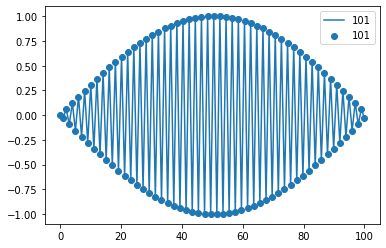

In [24]:
plt.plot(x101,y101,label='101')
plt.scatter(x101,y101,label='101')

plt.legend()
plt.show()

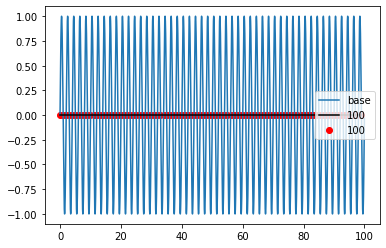

In [29]:
plt.plot(x,y,label='base')
plt.plot(x100,y100,color='black',label='100')
plt.scatter(x100,y100,color='red',label='100')

plt.legend()
plt.show()

## Q2 : part 'h'

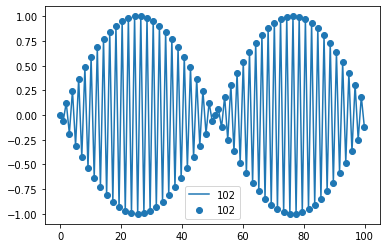

In [30]:
x102 = [x[i] for i in range(0,len(x),102)]
y102 = [y[i] for i in range(0,len(x),102)] 

plt.plot(x102,y102,label='102')
plt.scatter(x102,y102,label='102')

plt.legend()
plt.show()

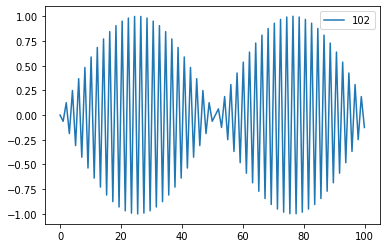

In [31]:
plt.plot(x102,y102,label='102')

plt.legend()
plt.show()

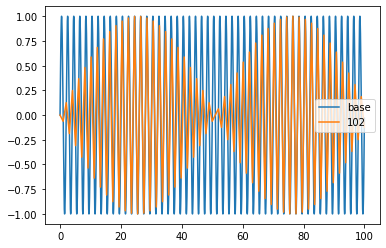

In [34]:
plt.plot(x,y,label='base')
plt.plot(x102,y102,label='102')

plt.legend()
plt.show()

for test:

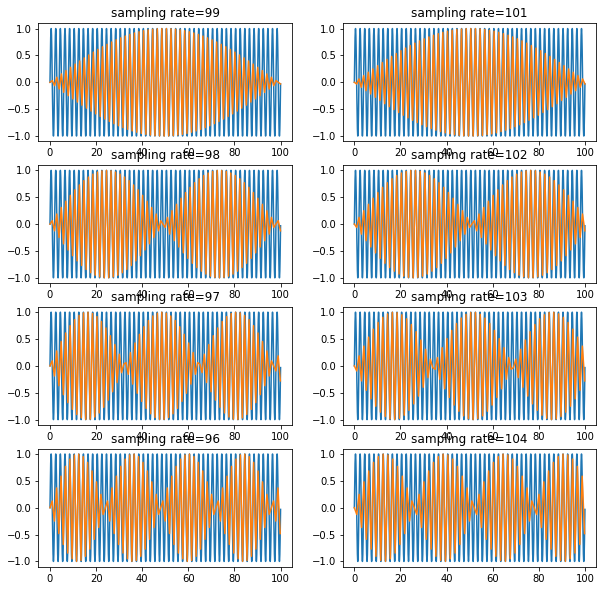

In [51]:
fig, ax = plt.subplots(4,2,figsize=(10,10))

for n in [96,97,98,99,101,102,103,104]:

    xn = [x[i] for i in range(0,len(x),n)]
    yn = [y[i] for i in range(0,len(x),n)] 

    ax2 = 1 * (n>100)
    ax1 = abs(100-n)-1
    
    ax[ax1][ax2].plot(x,y,label='base')
    ax[ax1][ax2].plot(xn,yn,label=str(n))
    ax[ax1][ax2].set_title('sampling rate='+str(n))

# Q3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [ ]:
img = tiff.imread('DC.tif')
img.shape

(191, 1280, 307)

In [ ]:
gt = tiff.imread('GT.tif')
gt.shape

(1280, 307)

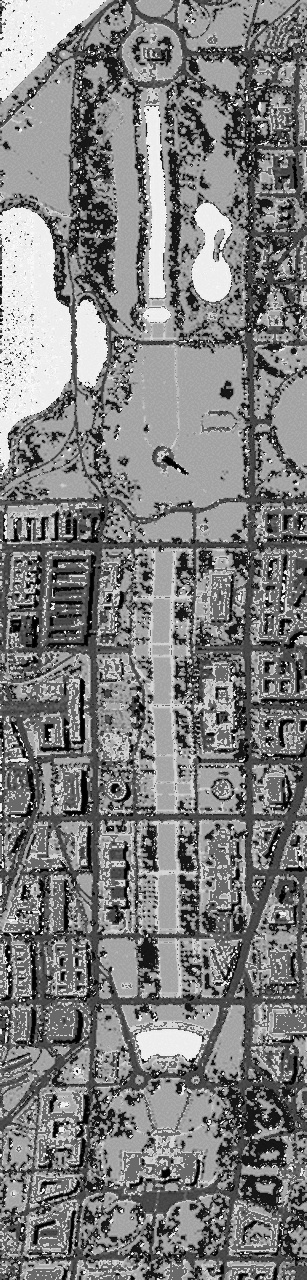

In [ ]:
cv2_imshow(gt)

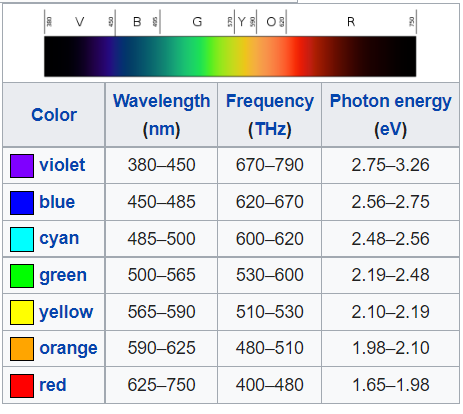

In [ ]:
# cred = (700+635)/2
# cblue = (490+450)/2
# cgreen = (560+520)/2
# print('rgb centers: ',cred,cgreen,cblue)

In [ ]:
# based on Landa.txt:
b_channel = 18 #465
g_channel = 36 #555
r_channel = 44 #610

In [ ]:
img.shape

(191, 1280, 307)

In [ ]:
def img_normalizer(a): 
    mi = min(map(min,a))
    ma = max(map(max,a))
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j] = (int(a[i][j]) - mi)/(ma-mi)*255*2+20
    return a

44 36 18


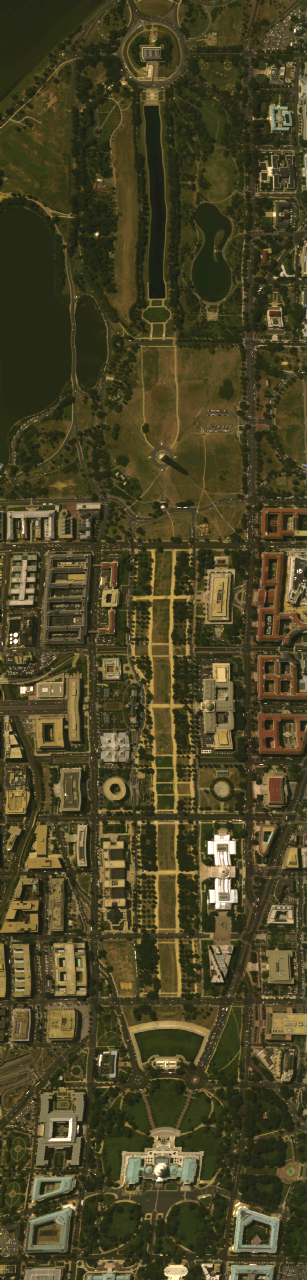

In [ ]:
r=r_channel
r_page = img_normalizer(img[r,:,:].reshape((1280,307))) 
g=g_channel
g_page = img_normalizer(img[g,:,:].reshape((1280,307)))
b=b_channel
b_page = img_normalizer(img[b,:,:].reshape((1280,307)))


rgb_page = np.dstack((b_page,g_page,r_page))
print(r,g,b)

cv2_imshow(rgb_page)